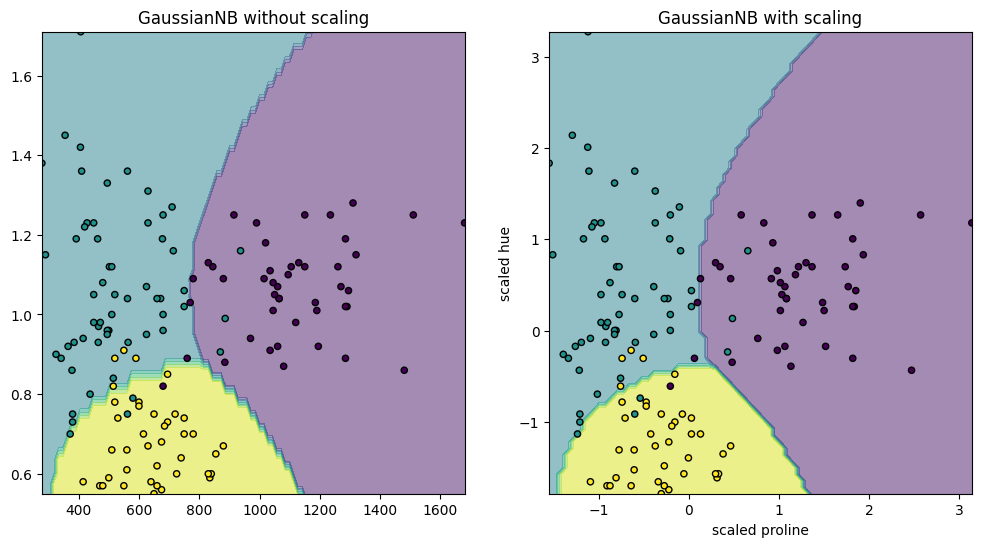

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_plot = X_train[:, [12, 10]]

clf = GaussianNB()


def fit_and_plot_model(X, y, clf, ax):
    clf.fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", alpha=0.5, ax=ax)
    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X[:, 0].min(), X[:, 0].max()))
    disp.ax_.set_ylim((X[:, 1].min(), X[:, 1].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fit_and_plot_model(X_plot, y_train, clf, ax1)
ax1.set_title("GaussianNB without scaling")

fit_and_plot_model(X_train_scaled[:, [12, 10]], y_train, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
ax2.set_title("GaussianNB with scaling")

plt.show()
